<a href="https://colab.research.google.com/github/mashrur-rahman-fahim/Machine_learning_projects/blob/main/Logistic_regression_project_without_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.
* You have historical data from previous applicants that you can use as a training set for logistic regression.
* For each training example, you have the applicant’s scores on two exams and the admissions decision.
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import copy
plt.style.use('ggplot')

In [ ]:
data=np.loadtxt('ex2data1_w3.txt',delimiter=',')
x=data[:,0:2]
y=data[:,2]
print(x[:5],y[:5])


[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]] [0. 0. 0. 1. 1.]


Text(0.5, 1.0, 'yellow=1')

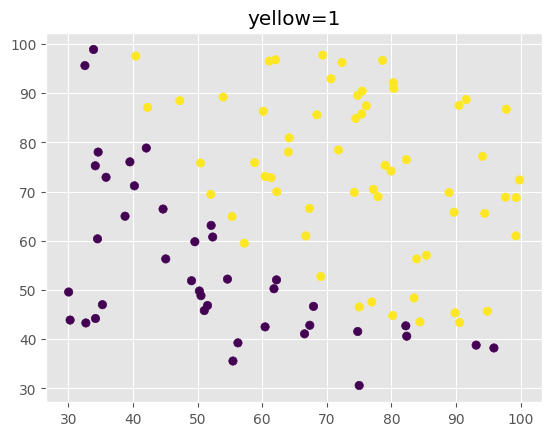

In [67]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.title("yellow=1")

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

for testing

In [ ]:
sigmoid(np.array([-1,0,1,2]))

array([0.26894142, 0.5       , 0.73105858, 0.88079708])

In [79]:
def cost_func(x,y,w,b,lamda_=1 ):
  m,n=x.shape
  cost=0
  for i in range(m):
    z=np.dot(x[i],w)+b
    f_wb=sigmoid(z)
    cost+=(-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb))
  cost/=(m)
  reg_cost=0
  for j in range(n):
    reg_cost+=(w[j]**2)
  reg_cost=(lamda_/(2*m))*reg_cost
  return reg_cost+cost


In [68]:
m,n=x.shape
w=np.zeros(n)
b=0
cost=cost_func(x,y,w,b)
cost

0.6931471805599458

In [80]:
test_w=np.full(n,0.2)
test_b=-24
test_cost=cost_func(x,y,test_w,test_b)
test_cost

0.21873019382659778

In [81]:
def com_grad(x,y,w,b,lamda_):
  m,n=x.shape
  dj_dw=np.zeros(n)
  dj_db=0
  for i in range(m):
    z=np.dot(x[i],w)+b
    f_wb=sigmoid(z)
    err=f_wb-y[i]
    for j in range(n):
      dj_dw[j]+=err*x[i,j]
    dj_db+=err
  dj_dw/=m
  dj_db/=m
  if lamda_:
    for j in range(n):
      dj_dw[j]+=(lamda_/m)*w[j]
  return dj_dw,dj_db


In [82]:
m,n=x.shape
w=np.zeros(n)
b=0
dj_dw,dj_db=com_grad(x,y,w,b)
print(dj_dw,dj_db)

[-12.00921659 -11.26284221] -0.1


In [83]:
test_w=np.array([0.2,-0.5])
test_b=-24
test_dj_dw,test_dj_db=com_grad(x,y,test_w,test_b)
print(test_dj_dw,test_dj_db)

[-44.83135362 -44.37384125] -0.5999999999991071


In [101]:
from copy import copy,deepcopy
def grad_des(x,y,w_in,b_in,it,alpha,cost_f,grad_f,lamda_):
  m,n=x.shape
  j_his=[]
  w_his=[]
  w=w_in
  b=b_in
  for i in range(it):
    dj_dw,dj_db=grad_f(x,y,w_in,b_in,lamda_)
    w-=alpha*dj_dw
    b-=alpha*dj_db
    j_his.append(cost_f(x,y,w,b,lamda_))
    w_his.append(w)
    if i%1000==0:
      print(f"iteration {i:4}: cost {j_his[-1]}")
  return w,b,j_his,w_his


In [104]:
np.random.seed(1)
intial_w=np.random.rand(n)
print(intial_w)
initial_b = -8
it=10000
alpha=0.001
lamda=0
w,b,j_his,w_his=grad_des(x,y,intial_w,initial_b,it,alpha,cost_func,com_grad,lamda)


[0.417022   0.72032449]
iteration    0: cost nan


<ipython-input-79-3643fba2583e>:7: RuntimeWarning: divide by zero encountered in log
  cost+=(-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb))
<ipython-input-79-3643fba2583e>:7: RuntimeWarning: invalid value encountered in scalar multiply
  cost+=(-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb))


iteration 1000: cost 0.3049541876701614
iteration 2000: cost 0.30469392634687986
iteration 3000: cost 0.3044896984321447
iteration 4000: cost 0.3043415994945478
iteration 5000: cost 0.3042497219972629
iteration 6000: cost 0.3042141552976012
iteration 7000: cost 0.3042349856471695
iteration 8000: cost 0.30431229619262035
iteration 9000: cost 0.3044461669769882


(20.0, 120.0, 20.0, 120.0)

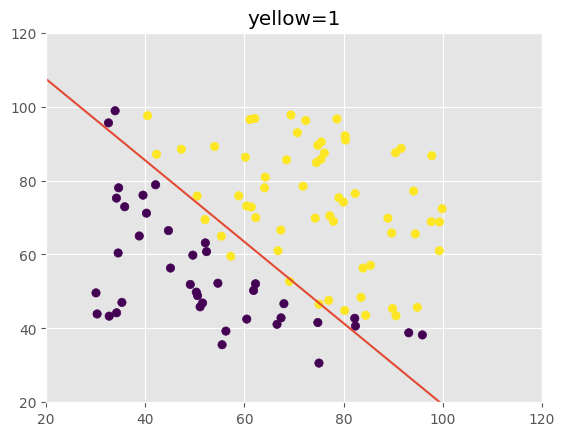

In [110]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.title("yellow=1")
x0=-b/w[0]
x1=-b/w[1]
plt.plot([0,x0],[x1,0])
plt.axis([20,120,20,120])

In [138]:
def predict(x,w,b):
  m,n=x.shape
  p=np.zeros(m)

  for i in range(m):
    z=np.dot(x[i],w)+b
    f_wb=sigmoid(z)

    if f_wb>0.43:
      p[i]=1




  return p

In [128]:
np.random.seed(1)
w_tmp=np.random.randn(2)
b_tmp=0.3
tmp_X = np.random.randn(4, 2) - 0.5
print(predict(tmp_X, w_tmp, b_tmp))


[0. 1. 1. 1.]


test with provided data

In [139]:
y_pred_an=predict(x,w,b)
print('Train Accuracy: %f'%(np.mean(y_pred_an == y) * 100))



Train Accuracy: 92.000000


scikit-learn

In [150]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x,y)
y_pred_sk=lr_model.predict(x)
print(lr_model.score(x,y))


0.89
